In [6]:
import rasterio as rio
import numpy as np

In [8]:
with rio.open('raw_data/ghana_2019_studyarea.tif', masked = True) as src:
    data = src.read()
    profile = src.profile

In [23]:
import numpy as np
from scipy.ndimage import generic_filter
from scipy.signal import medfilt 
    
#https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.medfilt.html
def most_common_value(arr):
    # Find the most common value in the neighborhood (excluding the central pixel)
    values, counts = np.unique(arr, return_counts=True)
    most_common_index = np.argmax(counts)
    return values[most_common_index]
 
# Your 2D array (example)
# array_2d = np.array([[1, 2, 3, 4, 5],
#                     [6, 7, 8, 9, 10],
#                     [11, 12, 13, 14, 15],
#                     [16, 17, 18, 19, 20],
#                     [21, 22, 23, 24, 25]])

original = np.random.randint(1,3, size = (5,5))

original

array([[1, 2, 2, 1, 1],
       [1, 1, 2, 2, 2],
       [2, 1, 1, 1, 2],
       [2, 2, 2, 2, 1],
       [1, 1, 1, 2, 2]])

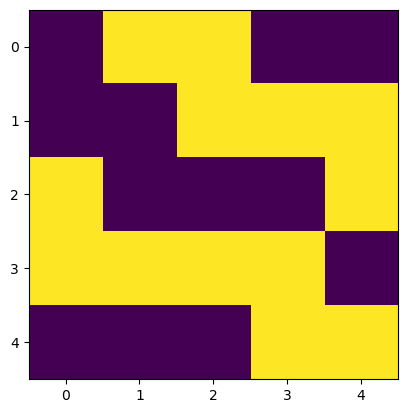

In [24]:
import matplotlib.pyplot as plt
plt.imshow(original)

array([[0, 1, 1, 1, 0],
       [1, 1, 1, 2, 1],
       [1, 2, 2, 2, 1],
       [1, 1, 1, 2, 1],
       [0, 1, 1, 1, 0]])

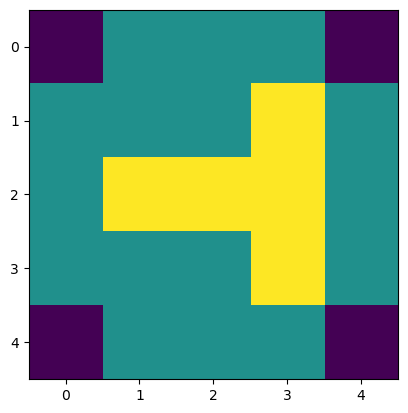

In [50]:
# Size of the kernel (3x3 in this example)
kernel_size = 3
 
# Apply the custom filter to the array
# result_array = generic_filter(original, most_common_value, size=kernel_size)

result_array = medfilt(original, kernel_size=3)
 
# print("Original array:")
# print(original)
# print("\nResult array:")
# print(result_array)

plt.imshow(result_array)
result_array

array([[1, 2, 2, 2, 1],
       [1, 1, 1, 2, 2],
       [2, 2, 2, 2, 2],
       [2, 1, 1, 2, 2],
       [1, 1, 2, 2, 2]])

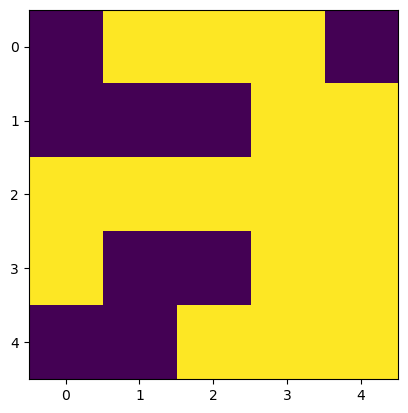

In [49]:
from scipy.ndimage import median_filter

result_array = median_filter(original, size=3)
 
# print("Original array:")
# print(original)
# print("\nResult array:")
# print(result_array)

plt.imshow(result_array)
result_array

array([[1, 1, 2, 2, 1],
       [1, 1, 1, 2, 1],
       [1, 2, 2, 2, 2],
       [1, 1, 1, 2, 2],
       [1, 1, 2, 2, 2]], dtype=uint8)

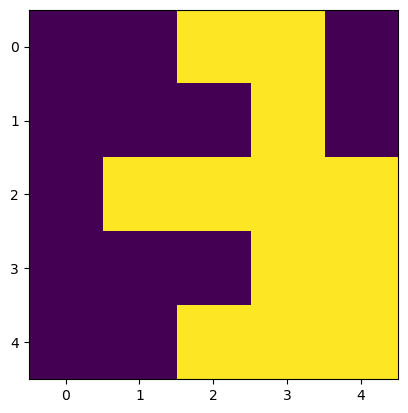

In [48]:
from skimage.filters.rank import modal
from skimage.morphology import disk, ball, cube, rectangle

result_array = modal(original, rectangle(3,3))

plt.imshow(result_array)
result_array

array([[1, 1, 2, 2, 1],
       [1, 1, 1, 2, 1],
       [1, 2, 2, 2, 2],
       [1, 1, 1, 2, 2],
       [1, 1, 2, 2, 2]], dtype=uint8)

In [41]:
# generates kernels
from skimage.morphology import disk, ball, cube, rectangle

# has the form name(size)
rectangle(3,3)

array([[1, 1, 1],
       [1, 1, 1],
       [1, 1, 1]], dtype=uint8)